In [158]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames
using CairoMakie


In [159]:
using Revise
using Newtrinos
using Newtrinos.osc

In [160]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);

In [161]:
experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

[ Info: Loading Katrin data


In [162]:
mass_nu=Newtrinos.katrin.get_neutrinomass(osc_cfg.flavour)

(::Newtrinos.katrin.var"#NeutrinoMassNND#11"{NND}) (generic function with 1 method)

In [163]:
par= Newtrinos.get_params(experiments)

(N = 30.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = -0.0024, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [164]:
mass_nu_value= mass_nu(par)

0.00925342428708903

In [165]:
osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

In [166]:
experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

[ Info: Loading Katrin data


In [167]:
NeutrinoMass_SM=Newtrinos.katrin.get_neutrinomass_SM(osc_cfg_SM.flavour)

(::Newtrinos.katrin.var"#NeutrinoMass_SM#4") (generic function with 1 method)

In [168]:
p = Newtrinos.get_params(experiments_SM)

(m₀ = 0.1, Δm²₂₁ = 7.53e-5, Δm²₃₁ = -0.0024, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [169]:
mass_nu_value_SM= NeutrinoMass_SM(p)

0.0123722316409

Calculation of m0 from m_nu measeurement in SM 

In [170]:
m_nu_squared=0.6 # eV^2, from KATRIN measurement

p= Newtrinos.get_params(experiments_SM)
U= Newtrinos.osc.get_PMNS(p)

sumU = 0.0

for i in 1:3
    sumU += abs(U[1,i])^2
end

term1= abs(U[1,2])^2*(p[:Δm²₂₁])
term2= abs(U[1,2])^2*(p[:Δm²₃₁])

m0_squared= (m_nu_squared-term1-term2) / sumU

m0=sqrt(m0_squared)

0.775047544063653

POSTERIOR STUDY

In [171]:
posterior_sm=Newtrinos.katrin.get_posterior_SM(p)

50×2 Matrix{Float64}:
 0.000127768   0.0113035
 0.0142012     0.0109607
 0.0316708     0.011405
 0.0500278     0.0118929
 0.071047      0.0125525
 0.100028      0.0131426
 0.123354      0.0137015
 0.150028      0.0142523
 0.200028      0.0149921
 0.250028      0.0153796
 0.300028      0.0153442
 0.350028      0.0150446
 0.400028      0.0143396
 ⋮            
 1.34919       5.00005e-5
 1.40951       0.0
 1.44399       0.0
 1.4871        0.0
 1.52158       0.0
 1.55606       0.0
 1.6121        0.0
 1.66813       0.0
 1.73707      -5.00004e-5
 1.7802        0.0
 1.84486       0.0
 1.93109       5.00004e-5

In [172]:
using CairoMakie
using CSV

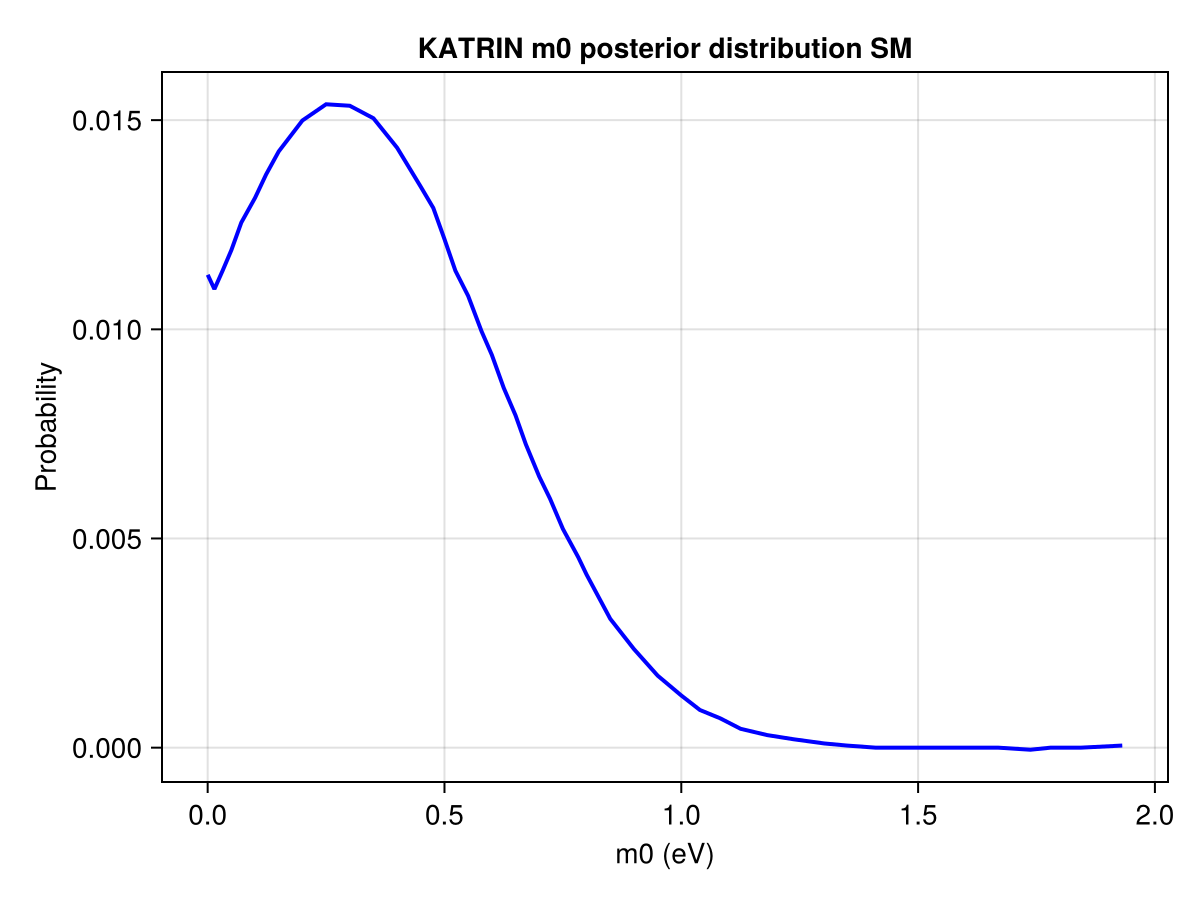

In [173]:
lines(posterior_sm[:, 1], posterior_sm[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution SM"),
      color=:blue,
      linewidth=2)
      

In [174]:
posterior_data_m_nu=CSV.read("/home/sofialon/Newtrinos.jl/src/experiments/katrin/posterior_m_nu.csv", DataFrame)

Row,mass,probability
,Float64,Float64
1,0.0001,0.01
2,0.0141734,0.01095
3,0.031643,0.0114
4,0.05,0.0118896
5,0.0710193,0.01255
6,0.1,0.0131408
7,0.123327,0.0137
8,0.15,0.014251
9,0.2,0.0149911


In [175]:

fig_1= Figure()
ax_1 = Axis(fig_1[1, 1], xlabel="mass (eV²)", ylabel="Probability", title="Posterior comparison SM")

lines!(ax_1, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="m₀²")
lines!(ax_1, posterior_data_m_nu[:, 1], posterior_data_m_nu[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="mₙᵤ²")

axislegend(ax_1)
fig_1



save("/home/sofialon/Newtrinos.jl/aug_plots/katrin/katrin_posterior_SM_IO.png", fig_1)

In [176]:
posterior_NN=Newtrinos.katrin.get_posterior_NN(par, osc_cfg.flavour)

50×2 Matrix{Float64}:
 0.0         0.0272201
 0.0133325   0.0106202
 0.0308021   0.0112475
 0.0491591   0.0117892
 0.0701783   0.0124755
 0.0991591   0.0130854
 0.122486    0.0136532
 0.149159    0.014211
 0.199159    0.0149595
 0.249159    0.0153529
 0.299159    0.015322
 0.349159    0.0150259
 0.399159    0.014324
 ⋮          
 1.34832     4.99844e-5
 1.40864     0.0
 1.44312     0.0
 1.48623     0.0
 1.52071     0.0
 1.55519     0.0
 1.61123     0.0
 1.66726     0.0
 1.7362     -4.99879e-5
 1.77933     0.0
 1.84399     0.0
 1.93022     4.99891e-5

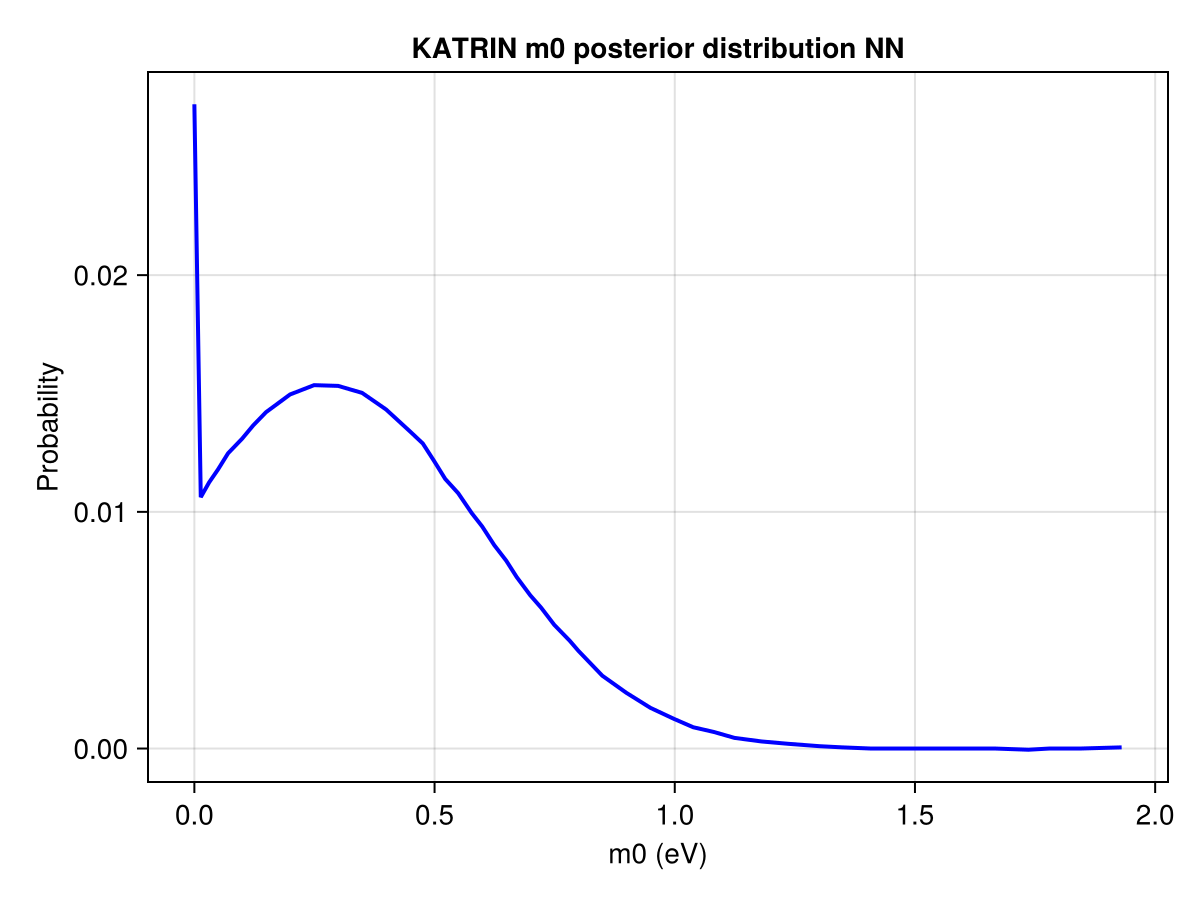

In [177]:
lines(posterior_NN[:, 1], posterior_NN[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution NN"),
      color=:blue,
      linewidth=2)

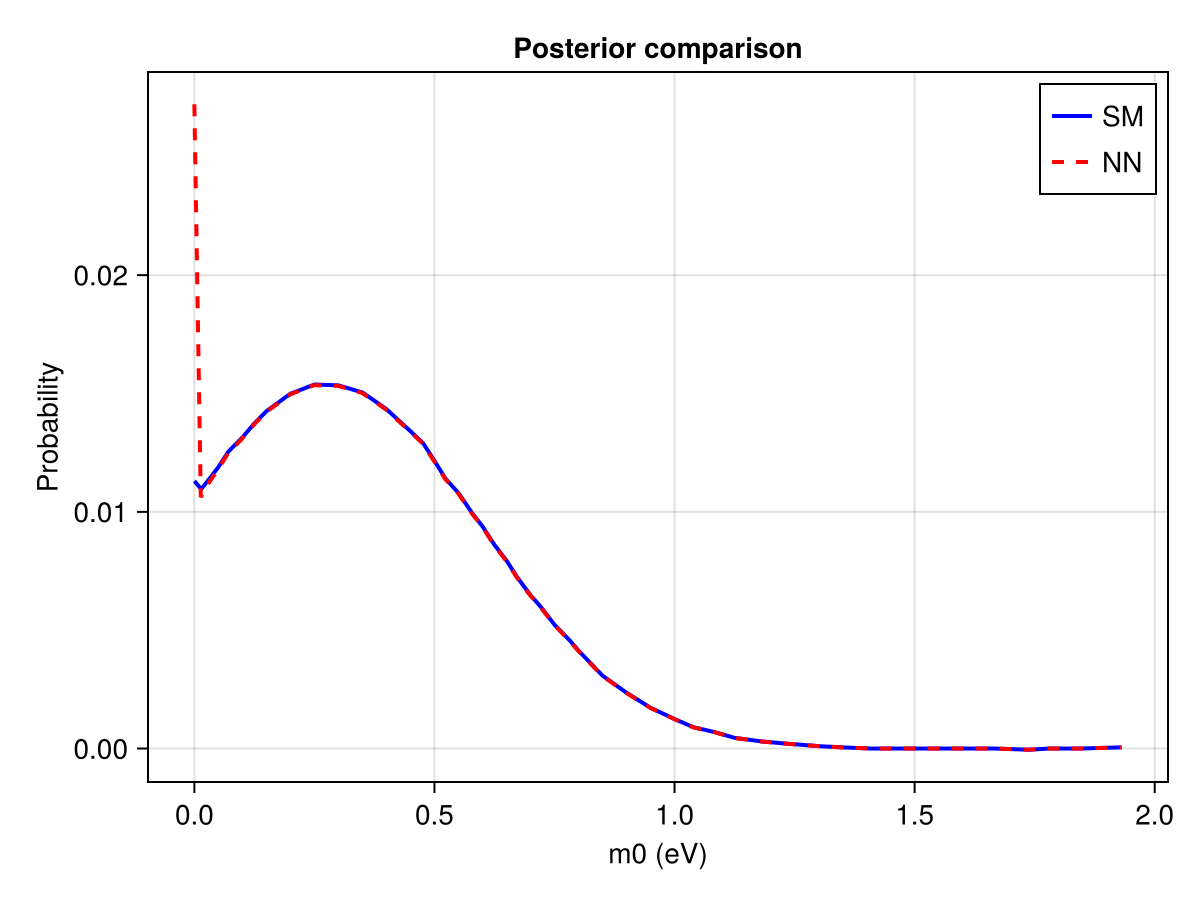

In [178]:

fig = Figure()
ax = Axis(fig[1, 1], xlabel="m0 (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NN")

axislegend(ax)
fig

In [179]:
N=round(Int,par[:N])
fig= Figure()
ax= Axis(fig[1, 1], xlabel="m0 (eV²)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NND $N")

xlims!(ax, 0.0001, nothing)
ylims!(ax, 0,0.02)  
axislegend(ax)
fig


save("/home/sofialon/Newtrinos.jl/aug_plots/katrin/katrin_posterior_NND_IO.png", fig)

Likelihood ratio and r-m0 estimation

In [98]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (m₀=31,Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
)
    


(m₀ = Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [99]:
likelihood = Newtrinos.generate_likelihood(experiments);

In [100]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, par)

Progress:   1%|▋                                        |  ETA: 0:00:18

Progress: 100%|█████████████████████████████████████████| Time: 0:00:13


NewtrinosResult((m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (N = [100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0; … ; 100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0], r = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 

In [101]:
println("Scan result: ", result.values.log_posterior)

Scan result: Any[0.5412804190192935 0.5412661026142054 0.5412517859745609 0.5412374691003596 0.5412231519916018 0.5412088346482871 0.5411945170704158 0.5411801992579877 0.5411658812110032 0.5411515629294619 0.5411372444133642 0.5411229256627095 0.5411086066774982 0.5410942874577302 0.5410799680034057 0.5410656483145244 0.5410513283910863 0.5410370082330918 0.5410226878405406 0.5410083672134327 0.5409940463517682 0.5409797252555468 0.5409654039247689 0.5409510823594343 0.5409367605595432 0.5409224385250953 0.5409081162560909 0.5408937937525296 0.5408794710144118 0.5408651480417372 0.5408508248345059; 0.4211297308618984 0.42111356533696687 0.4210973995774787 0.4210812335834335 0.4210650673548322 0.4210489008916738 0.4210327341939588 0.42101656726168724 0.42100040009485884 0.4209842326934736 0.42096806505753226 0.42095189718703385 0.42093572908197885 0.4209195607423668 0.4209033921681984 0.4208872233594734 0.42087105431619154 0.4208548850383531 0.4208387155259583 0.420822545779006 0.42080

In [102]:
#plot and save the image
#img = CairoMakie.plot(result)
#display("image/png", img)

In [103]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (m₀=31,Δm²₃₁=31)  

modified_priors = (
    #N = par.N,
    m₀ =all_priors.m₀,
    #r = all_priors.r,
    
   
  

    Δm²₂₁ = par.Δm²₂₁,
    Δm²₃₁ = all_priors.Δm²₃₁,
    δCP = par.δCP,
    θ₁₂ = par.θ₁₂,
    θ₁₃ = all_priors.θ₁₃,
    θ₂₃ = par.θ₂₃
    

)


(m₀ = Uniform{Float64}(a=0.001, b=2.0), Δm²₂₁ = 7.53e-5, Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = 0.8556288707523761)

In [104]:
likelihood = Newtrinos.generate_likelihood(experiments_SM);

In [105]:
result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, par)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


NewtrinosResult((m₀ = [0.001, 0.06763333333333334, 0.13426666666666667, 0.20090000000000002, 0.26753333333333335, 0.33416666666666667, 0.40080000000000005, 0.46743333333333337, 0.5340666666666667, 0.6007  …  1.4002999999999999, 1.4669333333333332, 1.5335666666666667, 1.6002, 1.6668333333333334, 1.7334666666666667, 1.8001, 1.8667333333333334, 1.9333666666666667, 2.0], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (N = [100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0; … ; 100.0 100.0 … 100.0 100.0; 100.0 100.0 … 100.0 100.0], r = [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], Δm²₂₁ = [7.53e-5 7.53e-5 … 7.53e-5 7.53e-5; 7.53e-5 7.53e-5 … 

In [106]:
#plot and save the image
#img = CairoMakie.plot(result)
#display("image/png", img)